Enter the path of the image: breast_cancer2/1_img1.bmp
Enter the path of the image fold: breast_cancer2/other_path_Breast



-----------------------------------------------------------------------------------------



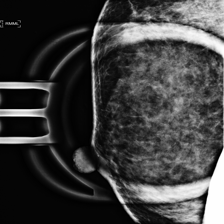

img path: /data/breast_cancer2/1_img1.bmp
Classification: 1
Probability: 0.5783663


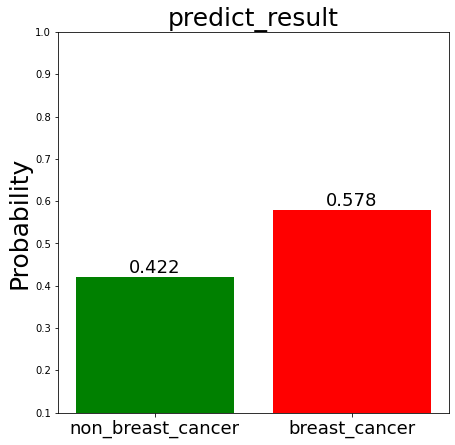


--------------------------------------------------------------------------------------------------------



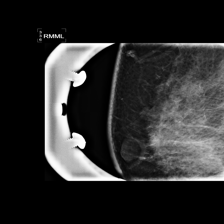

img path: /data/breast_cancer2/other_path_Breast/1_img2.bmp
Classification: 1
Probability: 0.5479525


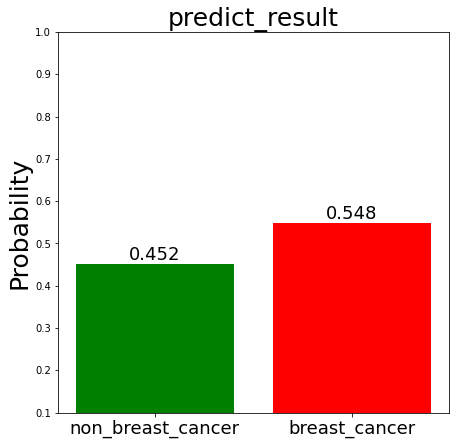


--------------------------------------------------------------------------------------------------------



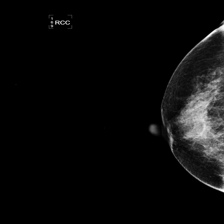

img path: /data/breast_cancer2/other_path_Breast/0_img4.bmp
Classification: 0
Probability: 0.3711869


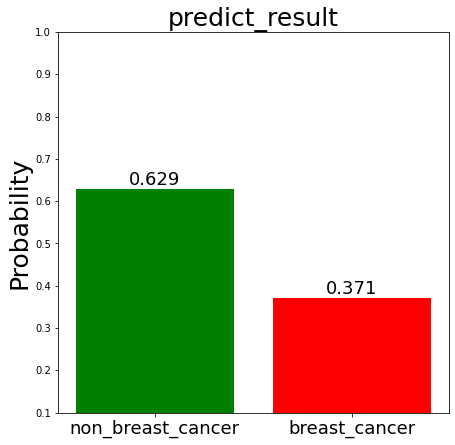


--------------------------------------------------------------------------------------------------------



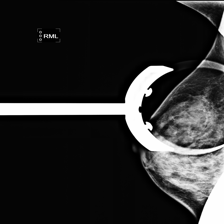

img path: /data/breast_cancer2/other_path_Breast/1_img6.bmp
Classification: 1
Probability: 0.5192366


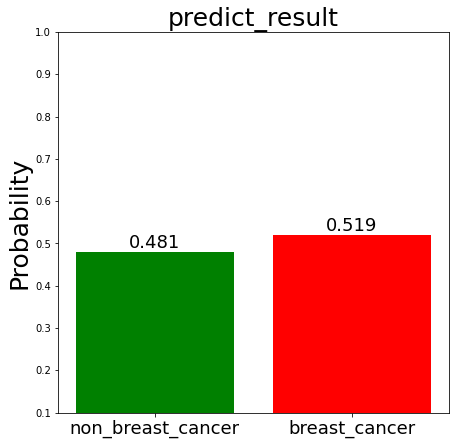


--------------------------------------------------------------------------------------------------------



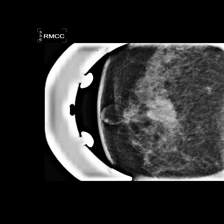

img path: /data/breast_cancer2/other_path_Breast/0_img5.bmp
Classification: 0
Probability: 0.46189627


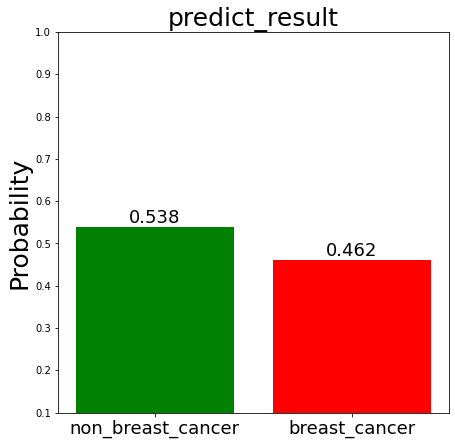


--------------------------------------------------------------------------------------------------------



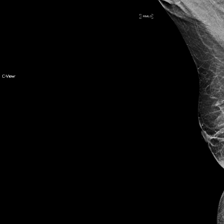

img path: /data/breast_cancer2/other_path_Breast/0_img3.bmp
Classification: 0
Probability: 0.362639


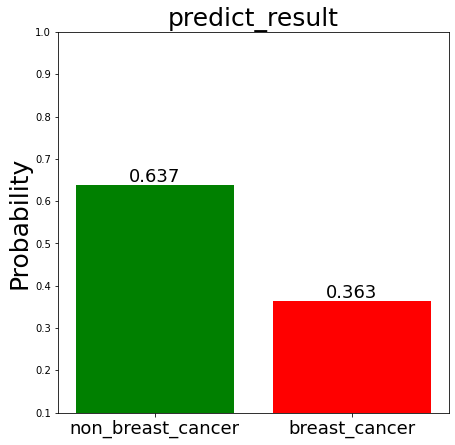


--------------------------------------------------------------------------------------------------------



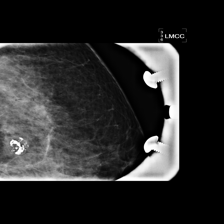

img path: /data/breast_cancer2/other_path_Breast/1_img8.bmp
Classification: 0
Probability: 0.41578424


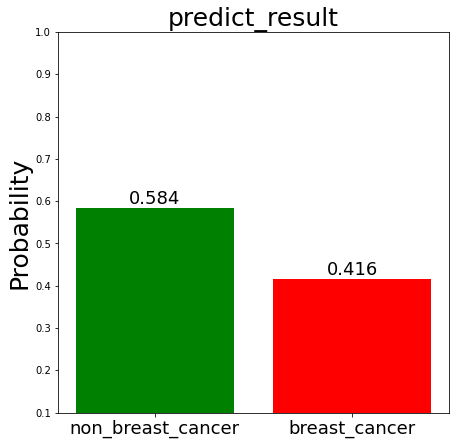


--------------------------------------------------------------------------------------------------------



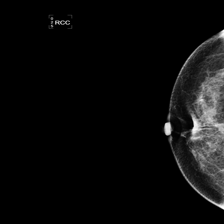

img path: /data/breast_cancer2/other_path_Breast/0_img2.bmp
Classification: 0
Probability: 0.45726955


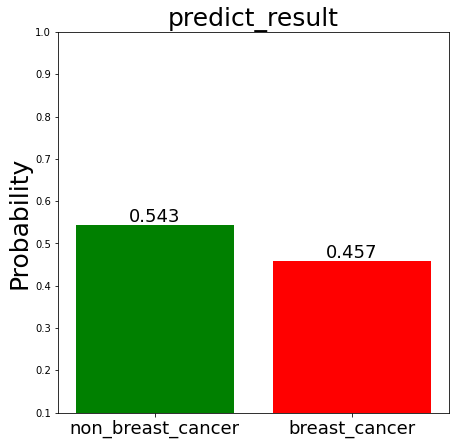


--------------------------------------------------------------------------------------------------------



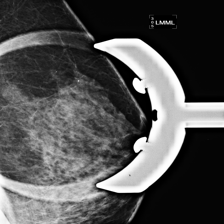

img path: /data/breast_cancer2/other_path_Breast/0_img9.bmp
Classification: 0
Probability: 0.4028126


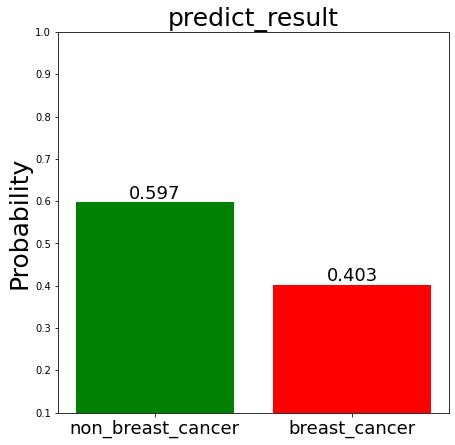


--------------------------------------------------------------------------------------------------------



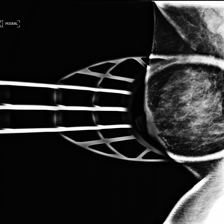

img path: /data/breast_cancer2/other_path_Breast/0_img7.bmp
Classification: 0
Probability: 0.34562755


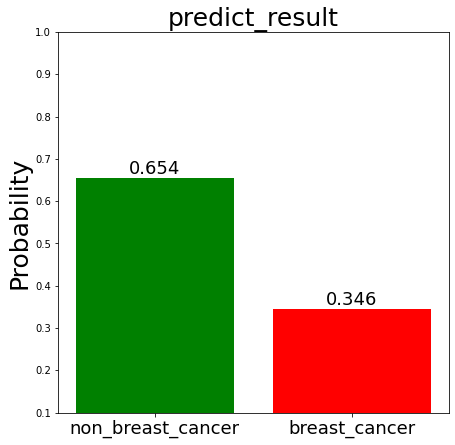


--------------------------------------------------------------------------------------------------------



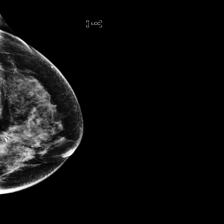

img path: /data/breast_cancer2/other_path_Breast/1_img7.bmp
Classification: 0
Probability: 0.3198167


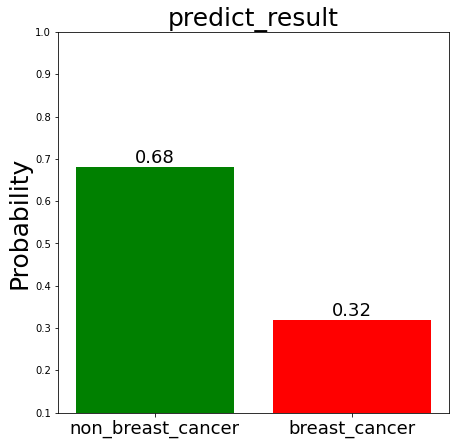


--------------------------------------------------------------------------------------------------------



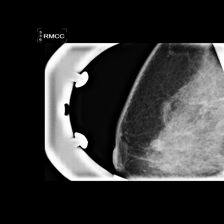

img path: /data/breast_cancer2/other_path_Breast/1_img3.bmp
Classification: 1
Probability: 0.530571


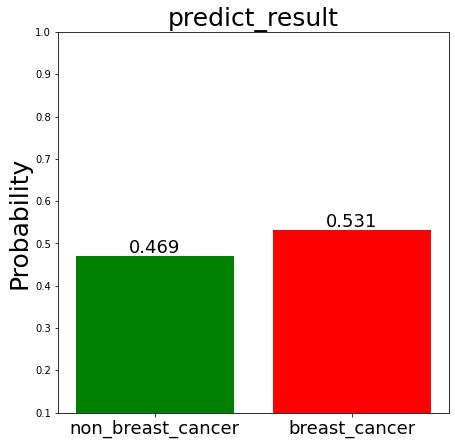


--------------------------------------------------------------------------------------------------------



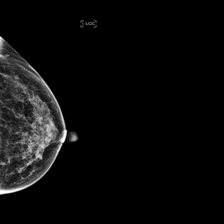

img path: /data/breast_cancer2/other_path_Breast/0_img6.bmp
Classification: 0
Probability: 0.3348913


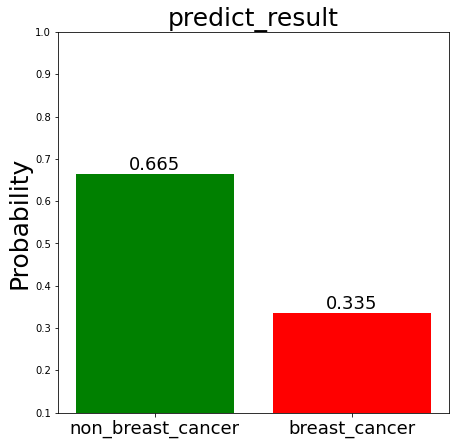


--------------------------------------------------------------------------------------------------------



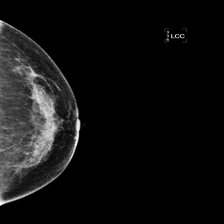

img path: /data/breast_cancer2/other_path_Breast/0_img1.bmp
Classification: 0
Probability: 0.321858


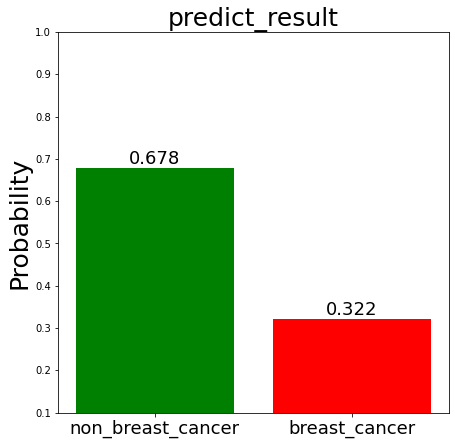


--------------------------------------------------------------------------------------------------------



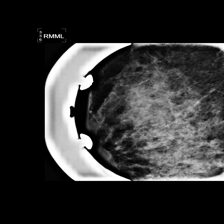

img path: /data/breast_cancer2/other_path_Breast/1_img4.bmp
Classification: 1
Probability: 0.54537433


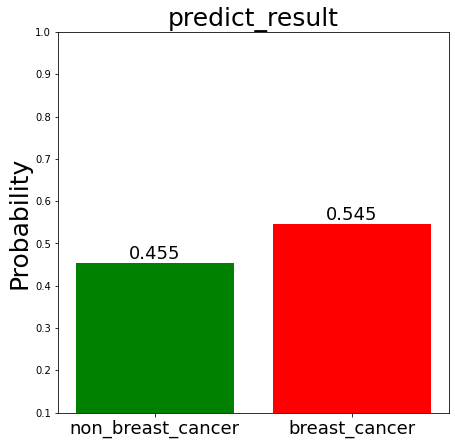


--------------------------------------------------------------------------------------------------------



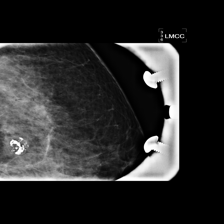

img path: /data/breast_cancer2/other_path_Breast/0_img8.bmp
Classification: 0
Probability: 0.41578424


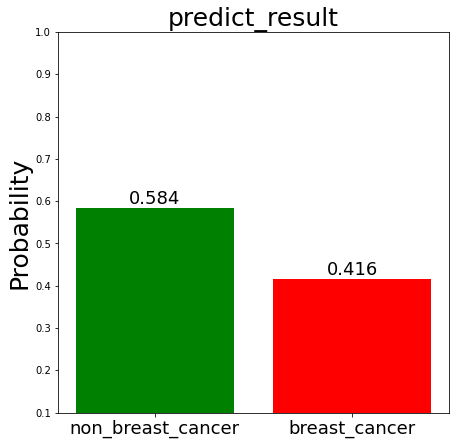


--------------------------------------------------------------------------------------------------------



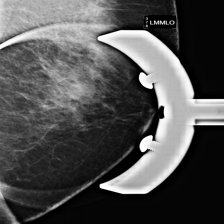

img path: /data/breast_cancer2/other_path_Breast/1_img10.bmp
Classification: 0
Probability: 0.37611786


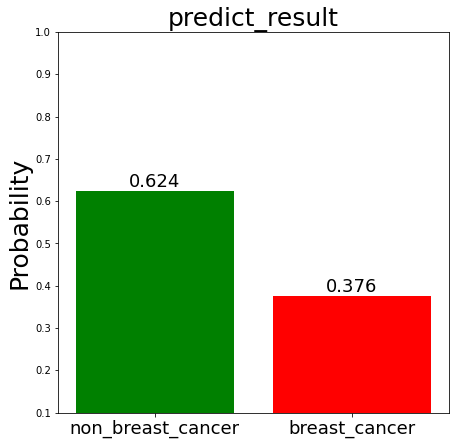


--------------------------------------------------------------------------------------------------------



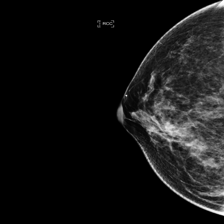

img path: /data/breast_cancer2/other_path_Breast/1_img9.bmp
Classification: 0
Probability: 0.38125676


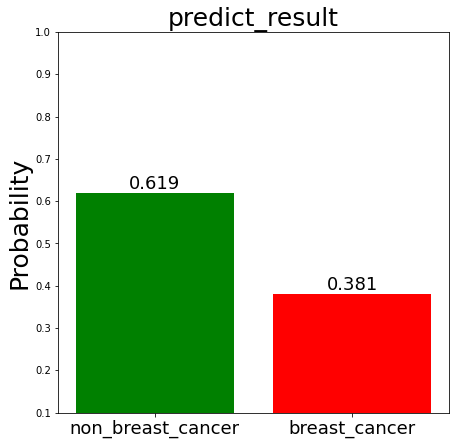


--------------------------------------------------------------------------------------------------------



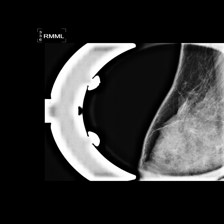

img path: /data/breast_cancer2/other_path_Breast/0_img10.bmp
Classification: 0
Probability: 0.37940335


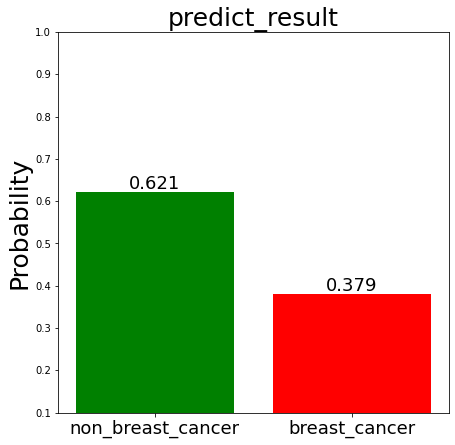


--------------------------------------------------------------------------------------------------------



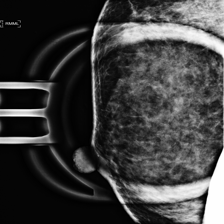

img path: /data/breast_cancer2/other_path_Breast/1_img1.bmp
Classification: 1
Probability: 0.5783663


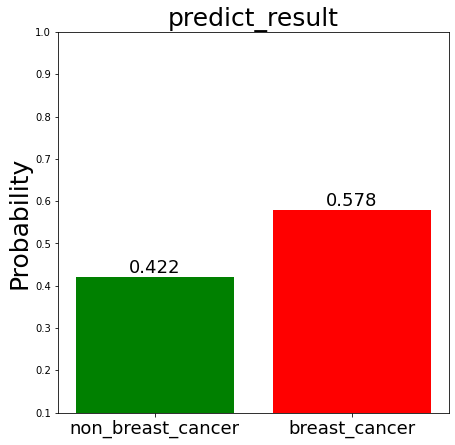


--------------------------------------------------------------------------------------------------------



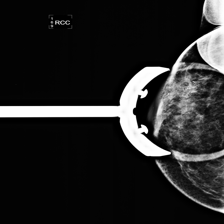

img path: /data/breast_cancer2/other_path_Breast/1_img5.bmp
Classification: 1
Probability: 0.78683174


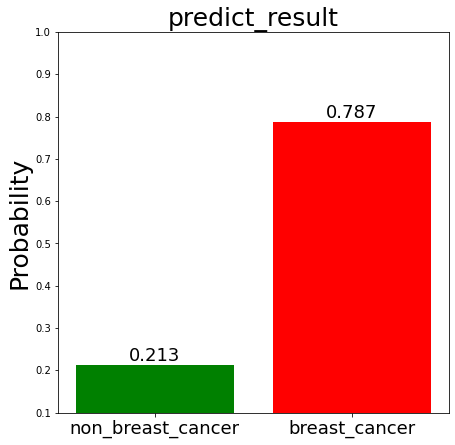


--------------------------------------------------------------------------------------------------------



['/data/breast_cancer2/1_img1.bmp',
 1,
 0.5783663,
 '/data/breast_cancer2/other_path_Breast/1_img2.bmp',
 1,
 0.5479525,
 '/data/breast_cancer2/other_path_Breast/0_img4.bmp',
 0,
 0.3711869,
 '/data/breast_cancer2/other_path_Breast/1_img6.bmp',
 1,
 0.5192366,
 '/data/breast_cancer2/other_path_Breast/0_img5.bmp',
 0,
 0.46189627,
 '/data/breast_cancer2/other_path_Breast/0_img3.bmp',
 0,
 0.362639,
 '/data/breast_cancer2/other_path_Breast/1_img8.bmp',
 0,
 0.41578424,
 '/data/breast_cancer2/other_path_Breast/0_img2.bmp',
 0,
 0.45726955,
 '/data/breast_cancer2/other_path_Breast/0_img9.bmp',
 0,
 0.4028126,
 '/data/breast_cancer2/other_path_Breast/0_img7.bmp',
 0,
 0.34562755,
 '/data/breast_cancer2/other_path_Breast/1_img7.bmp',
 0,
 0.3198167,
 '/data/breast_cancer2/other_path_Breast/1_img3.bmp',
 1,
 0.530571,
 '/data/breast_cancer2/other_path_Breast/0_img6.bmp',
 0,
 0.3348913,
 '/data/breast_cancer2/other_path_Breast/0_img1.bmp',
 0,
 0.321858,
 '/data/breast_cancer2/other_path_Bre

In [163]:
from keras.models import load_model                  #load h5 
import cv2                                           #load img 
import numpy as np                                   #Array String tools
from keras import optimizers                         #keras model optimizers(優化器)
import glob                                          #catch file path 
from datetime import datetime, timezone, timedelta   #get time zone
from PIL import Image                                #set img size
import matplotlib.pyplot as plt                      #visualize

tz = timezone(timedelta(hours=+8))                   #UTC + 8:00
x = input('Enter the path of the image:')            #path input box
y = input('Enter the path of the image fold:')
print('\n'+"-----------------------------------------------------------------------------------------"+'\n')

model= load_model('Binary_Breast_20210510120454.h5')
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.01,beta_1=0.9, beta_2=0.999, amsgrad=False), metrics=['accuracy'])
# model_summary=model.summary()                                              # model preview
ind_pic_path=[]                                                              # image file
dirpathpatten=y                                                              # image fold

def predict(ind_pic_path,dirpathpatten):
    if len((x)) >3 :                                                         # null path or not
        ind_pic_path.append('/data/'+x)

    #資料夾陣列
    if len((y)) >3:                                                          # null path or not
        try:
            floder_result=glob.glob('/data/'+dirpathpatten+'/*bmp')          #glob *.bmp
            floder_result.extend(glob.glob('/data/'+dirpathpatten+'/*jpg'))  #glob *.jpg
            for path in floder_result:
                ind_pic_path.append(path)                                    #image file append image fold
        except:
            pass   
    
    ind_pic_path_num=len(ind_pic_path)
    all_sult=[]
    i=0
    for pic in ind_pic_path:
        if i < ind_pic_path_num:
            img = cv2.imread(ind_pic_path[i])                                #reshape img 
            img = cv2.resize(img,(224,224))
            img = np.reshape(img,[1,224,224,3])
            img=img/255.0
            
            predict = model.predict(img)
            predict_sult = np.argmax(predict)                                #choose the big one
            
            show_img = Image.open(ind_pic_path[i])                           #show img
            show_img2= show_img.resize((224, 224))                        
            show_img2.show()
            
            all_sult.append(ind_pic_path[i])                                 #show file path
            print("img path:",ind_pic_path[i])
            
            all_sult.append(predict_sult)                                    #show classification sult
            print("Classification:",predict_sult)
            
            all_sult.append(predict[0,1]) #機率值 type(ndarray)              #show probability sult
            print("Probability:",predict[0,1])
            
            plt.subplots(figsize=(7,7))                                                 #show bar figure
            left = np.array([0, 1])                                                     #x-value
            height = np.array([(1-predict[0,1]),predict[0,1]])                          #y-value
            labels = ['non_breast_cancer', 'breast_cancer']                             #x-label
            plt.ylabel("Probability",fontsize=25)                                       #y-label
            plt.title("predict_result",fontsize=25)                                     #img-title
            plt.xticks(fontsize=18)                                                     #xticks
            plt.ylim([0.1,1.0])                                                         #yticks
            plt.bar(left, height,width=0.8,color=['green','red'],tick_label=labels)     #chart bar
            for index, value in enumerate(height):                                      #show value on bar     
                plt.text(index,value, str(round(value,3)),verticalalignment="bottom",horizontalalignment="center", size=18)
            plt.show()
            print('\n'+"--------------------------------------------------------------------------------------------------------"+'\n')
            
            i+=1
            
    path = '/data/breast_cancer2/all_sult.txt'                              # write record to txt
    write_len=len(all_sult)
   # print(write_len)
    f = open(path, 'w')

    i=0
    for write in all_sult:
        if i > write_len:
            return
        else:
            f.write(str(all_sult[i]))
            if (i+1)%3==0:
                f.write('\n'+"--------------------------"+'\n')
            f.write('\n')
            i+=1
            
    f.write(str(datetime.now(tz)))                                         # write record time
    f.close()
    return(all_sult)                                                       #結果集合 [path , 0/1 , 1的機率]

predict(ind_pic_path,dirpathpatten)
